In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models, layers
import warnings

warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('/kaggle/input/cross-site-scripting-xss-dataset-for-deep-learning/XSS_dataset.csv', encoding='utf-8-sig')
X = df['Sentence']
y = df['Label']

In [4]:
df.head()

,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [5]:
df.isna().sum()

Unnamed: 0    0
Sentence      0
Label         0
dtype: int64

In [6]:
text = ''.join(df['Sentence'].tolist())

In [7]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

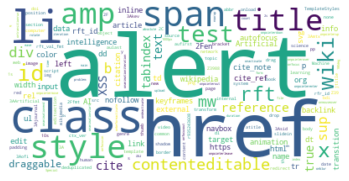

In [8]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='Label', ylabel='count'>

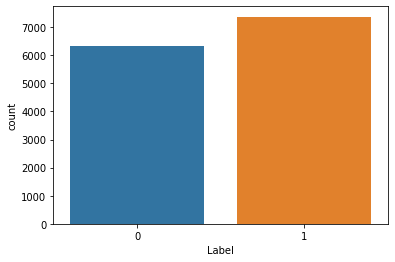

In [9]:
sns.countplot(x='Label',data=df)

In [10]:
import nltk

nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [11]:
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10948, 5640)
(10948,)
(2738, 5640)
(2738,)


In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_pred, y_test)}")
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of Logistic Regression on test set : 0.9985390796201608
F1 Score of Logistic Regression on test set : 0.9986101459346769
sensitivity= 0.9979166666666667
specificity= 0.9992295839753467
Precision= 0.9993045897079277


<AxesSubplot:>

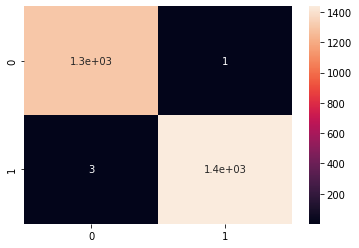

In [13]:
from sklearn.metrics import confusion_matrix
cf_matrix_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix_lr, annot=True)

In [14]:
from sklearn.ensemble import AdaBoostClassifier

In [15]:
lr_clf = AdaBoostClassifier(n_estimators=100)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
print(f"Accuracy of AadaBoost on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of AadaBoost on test set : {f1_score(y_pred, y_test)}")
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of AadaBoost on test set : 0.9992695398100804
F1 Score of AadaBoost on test set : 0.9993050729673384
sensitivity= 0.9986111111111111
specificity= 1.0
Precision= 1.0


<AxesSubplot:>

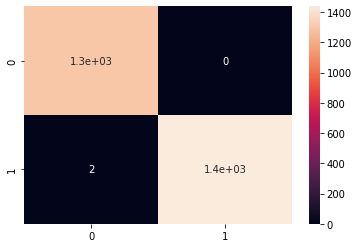

In [16]:
from sklearn.metrics import confusion_matrix
cf_matrix_ada = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix_ada, annot=True)

In [17]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")

confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of Naive Bayes on test set : 0.8889700511322133
F1 Score of Naive Bayes on test set : 0.9044626021370208
sensitivity= 0.9993055555555556
specificity= 0.7665639445300462
Precision= 0.8260619977037887


<AxesSubplot:>

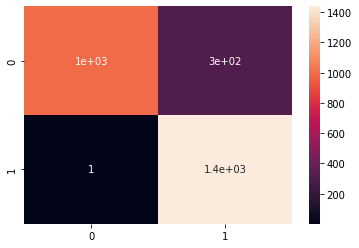

In [18]:
from sklearn.metrics import confusion_matrix
cf_matrix_gnb = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix_gnb, annot=True)

In [19]:
import xgboost as xgb

In [20]:
xgb_mod = xgb.XGBClassifier(n_estimators=100)
xgb_mod.fit(X_train, y_train)
y_pred = xgb_mod.predict(X_test)
print(f"Accuracy of XGBoost on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of XGBoost on test set : {f1_score(y_pred, y_test)}")
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of XGBoost on test set : 0.9970781592403214
F1 Score of XGBoost on test set : 0.9972183588317107
sensitivity= 0.9958333333333333
specificity= 0.9984591679506933
Precision= 0.9986072423398329


<AxesSubplot:>

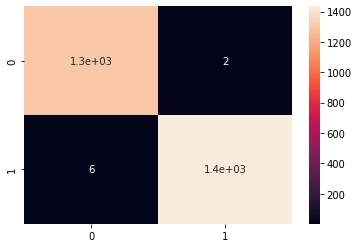

In [21]:
from sklearn.metrics import confusion_matrix
cf_matrix_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix_xgb, annot=True)

In [22]:
import numpy as nm  
import matplotlib.pyplot as mtp

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
nb_clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(f"Accuracy of Decision Tree on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Decision Tree on test set : {f1_score(y_pred, y_test)}")
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of Decision Tree on test set : 0.9989043097151206
F1 Score of Decision Tree on test set : 0.9989579715178881
sensitivity= 0.9986111111111111
specificity= 0.9992295839753467
Precision= 0.9993050729673384


<AxesSubplot:>

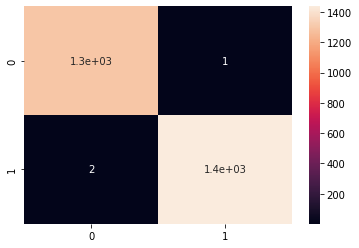

In [25]:
from sklearn.metrics import confusion_matrix
cf_matrix_dt = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix_dt, annot=True)

# Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# For Logistic Regression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lr_cv=GridSearchCV(lr,grid,cv=10)
lr_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [28]:
y_pred = lr_cv.predict(X_test)
acc_lr = accuracy_score(y_pred, y_test)
print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_pred, y_test)}")
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of Logistic Regression on test set : 0.9989043097151206
F1 Score of Logistic Regression on test set : 0.9989579715178881
sensitivity= 0.9986111111111111
specificity= 0.9992295839753467
Precision= 0.9993050729673384


In [29]:
# For Adaboost
parameters = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30]
}
clf = GridSearchCV(lr_clf, parameters, cv=5, verbose=1, n_jobs=10)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=100), n_jobs=10,
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20, 30]},
             verbose=1)

In [30]:
y_pred = clf.predict(X_test)
acc_ada = accuracy_score(y_pred, y_test)
print(f"Accuracy of AadaBoost on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of AadaBoost on test set : {f1_score(y_pred, y_test)}")
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of AadaBoost on test set : 0.9985390796201608
F1 Score of AadaBoost on test set : 0.9986101459346769
sensitivity= 0.9979166666666667
specificity= 0.9992295839753467
Precision= 0.9993045897079277


In [31]:
# For Gaussian NB
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb_cv = GridSearchCV(nb, parameters, cv=5, verbose=1, n_jobs=10)
gnb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=10,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [32]:
y_pred = gnb_cv.predict(X_test)
acc_gnb = accuracy_score(y_pred, y_test)
print(f"Accuracy of GaussianNB on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of GaussianNB on test set : {f1_score(y_pred, y_test)}")
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of GaussianNB on test set : 0.8889700511322133
F1 Score of GaussianNB on test set : 0.9044626021370208
sensitivity= 0.9993055555555556
specificity= 0.7665639445300462
Precision= 0.8260619977037887


In [33]:
# For XGBOOST
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}
xgb_cv = GridSearchCV(xgb_mod, parameters, n_jobs=5, 
                   cv=10, 
                   scoring='accuracy',
                   verbose=2, refit=True)

xgb_cv.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[19:26:20] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_c...
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             n_jobs

In [34]:
y_pred = xgb_cv.predict(X_test)
acc_xgb = accuracy_score(y_pred, y_test)
print(f"Accuracy of XGBoost on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of XGBoost on test set : {f1_score(y_pred, y_test)}")
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)

Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of XGBoost on test set : 0.9941563184806428
F1 Score of XGBoost on test set : 0.9944134078212291
sensitivity= 0.9888888888888889
specificity= 1.0
Precision= 1.0


In [35]:
# For DecisionTree Classifier
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dct_cv= GridSearchCV(nb_clf, tree_para, cv=5)
dct_cv.fit(X_train, y_train)

[19:25:29] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8; total time=  26.4s
[19:25:56] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weig

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [36]:
y_pred = dct_cv.predict(X_test)
acc_dct = accuracy_score(y_pred, y_test)
print(f"Accuracy of Decision Tree on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Decision Tree on test set : {f1_score(y_pred, y_test)}")
confusion = confusion_matrix(y_test, y_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sensitivity = TP / float(FN + TP)

print("sensitivity=",sensitivity)
specificity = TN / (TN + FP)
print("specificity=",specificity)


Precision = TP / float(TP + FP)
Recall = TP / float(TP + FN)
F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

Accuracy of Decision Tree on test set : 0.9989043097151206
F1 Score of Decision Tree on test set : 0.9989579715178881
sensitivity= 0.9986111111111111
specificity= 0.9992295839753467
Precision= 0.9993050729673384
